In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
os.getcwd()

'/kaggle/working'

In [3]:
import tensorflow as tf 

In [4]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import to_categorical
from PIL import Image 
from keras.models  import Model,Sequential
from keras.layers import Flatten,Dense, Dropout
from keras.layers import Convolution2D, MaxPool2D
from keras.layers import BatchNormalization, GlobalAveragePooling2D
from keras.optimizers import Adam 
from keras.applications.inception_v3 import InceptionV3
import cv2

Using TensorFlow backend.


In [5]:
os.getcwd()

'/kaggle/working'

In [6]:
PATH = ("/kaggle/input/individual-face-recognition/image/image")
#Test_Path = ("/kaggle/input/face-recognition/test/test")
Test_path = ("/kaggle/input/individual-face-recognition/new folder")

In [7]:
DATA_PATH = os.path.join(PATH, 'Data')
TEST_PATH = os.path.join(Test_path, 'New folder')
test_dir_list=os.listdir(Test_path)
data_dir_list = os.listdir(DATA_PATH)
print(data_dir_list)
print(test_dir_list)

['Male', 'Female']
['New folder']


In [8]:
img_rows=210
img_cols=190
num_channel=3

num_epoch = 15
batch_size = 32

img_data_list=[]
classes_names_list=[]
target_column=[]

In [9]:
for dataset in data_dir_list:
    classes_names_list.append(dataset)
    print("Getting images from {} folder\n".format(dataset))
    img_list = os.listdir(DATA_PATH +'/'+ dataset)
    for img in img_list:
        input_img = cv2.imread(DATA_PATH + '/' + dataset + '/' + img)
        input_img_resize=cv2.resize(input_img,(img_rows,img_cols))
        img_data_list.append(input_img_resize)
        target_column.append(dataset)

Getting images from Male folder

Getting images from Female folder



In [10]:
num_classes = len(classes_names_list)
print(num_classes)

2


In [11]:
#normalizing it 
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255

In [12]:
#resizing the images and the num of samples
print(len(img_data))
print(img_data.shape)

2378
(2378, 190, 210, 3)


In [13]:
#what is happening?
classes_names_list

['Male', 'Female']

In [14]:
num_of_samples = img_data.shape[0]
input_shape = img_data[0].shape

In [15]:
print(input_shape)

(190, 210, 3)


In [16]:
from sklearn.preprocessing import LabelEncoder
Labelencoder = LabelEncoder()
target_column = Labelencoder.fit_transform(target_column)

In [17]:
from collections import Counter
#Counter(classes).values()
classes = target_column
    # classes = np.ones((num_of_samples,),dtype = 'int64')
classes

array([1, 1, 1, ..., 0, 0, 0])

In [18]:
classes.shape

(2378,)

In [19]:
from keras.utils import to_categorical

classes = to_categorical(classes, num_classes)

In [20]:
from sklearn.utils import shuffle

X, Y = shuffle(img_data, classes, random_state=123)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [22]:
y_test.shape

(476, 2)

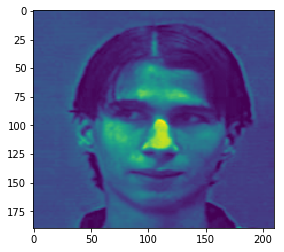

In [23]:
#Sample
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
g = plt.imshow(X_train[1][:,:,0])

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [25]:
model = Sequential()

model.add(Conv2D(16,(3,3),activation = "relu", input_shape=input_shape))
model.add(Conv2D(16,(3,3),activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))


In [26]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 188, 208, 16)      448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 186, 206, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 93, 103, 16)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 93, 103, 16)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 153264)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4904480   
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)               

In [27]:
cnn_1 = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 1902 samples, validate on 476 samples
Epoch 1/15
1902/1902 [==============================] - 5s 3ms/step - loss: 0.8553 - accuracy: 0.8431 - val_loss: 0.3942 - val_accuracy: 0.8613
Epoch 2/15
1902/1902 [==============================] - 2s 954us/step - loss: 0.2746 - accuracy: 0.8523 - val_loss: 0.1822 - val_accuracy: 0.8613
Epoch 3/15
1902/1902 [==============================] - 2s 959us/step - loss: 0.2019 - accuracy: 0.8820 - val_loss: 0.1303 - val_accuracy: 0.9496
Epoch 4/15
1902/1902 [==============================] - 2s 954us/step - loss: 0.1677 - accuracy: 0.9398 - val_loss: 0.1578 - val_accuracy: 0.9454
Epoch 5/15
1902/1902 [==============================] - 2s 944us/step - loss: 0.1396 - accuracy: 0.9564 - val_loss: 0.1108 - val_accuracy: 0.9916
Epoch 6/15
1902/1902 [==============================] - 2s 950us/step - loss: 0.1192 - accuracy: 0.9661 - val_loss: 0.1123 - val_accuracy: 0.9664
Epoch 7/15
1902/1902 [==============================] - 2s 947us/step - loss: 0

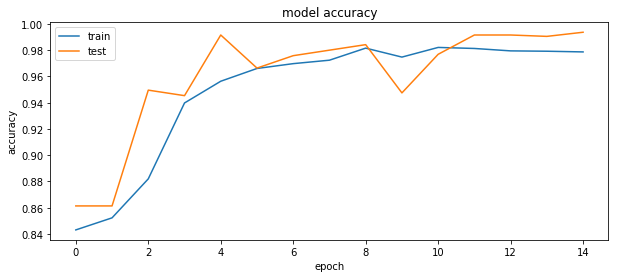

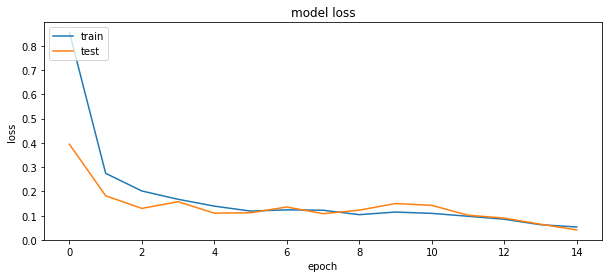

In [28]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 4
plt.plot(cnn_1.history['accuracy'])
plt.plot(cnn_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(cnn_1.history['loss'])
plt.plot(cnn_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
model_2 = Sequential()

model_2.add(Conv2D(16,(3,3),activation = "relu", input_shape=input_shape))
model_2.add(Conv2D(16,(3,3),activation = "relu"))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.70))

model_2.add(Flatten())
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(num_classes, activation='sigmoid'))
model_2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=["accuracy"])
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 188, 208, 16)      448       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 186, 206, 16)      2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 93, 103, 16)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 93, 103, 16)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 153264)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4904480   
_________________________________________________________________
dense_4 (Dense)              (None, 2)                

In [30]:
cnn_2 = model_2.fit(X_train, y_train, batch_size=batch_size, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 1902 samples, validate on 476 samples
Epoch 1/15
1902/1902 [==============================] - 2s 1ms/step - loss: 0.4347 - accuracy: 0.8751 - val_loss: 0.1840 - val_accuracy: 0.9674
Epoch 2/15
1902/1902 [==============================] - 2s 929us/step - loss: 0.1503 - accuracy: 0.9387 - val_loss: 0.1375 - val_accuracy: 0.9254
Epoch 3/15
1902/1902 [==============================] - 2s 931us/step - loss: 0.1073 - accuracy: 0.9225 - val_loss: 0.1037 - val_accuracy: 0.9286
Epoch 4/15
1902/1902 [==============================] - 2s 932us/step - loss: 0.0703 - accuracy: 0.9582 - val_loss: 0.0381 - val_accuracy: 0.9916
Epoch 5/15
1902/1902 [==============================] - 2s 924us/step - loss: 0.0150 - accuracy: 0.9968 - val_loss: 0.0219 - val_accuracy: 0.9958
Epoch 6/15
1902/1902 [==============================] - 2s 934us/step - loss: 0.0060 - accuracy: 0.9979 - val_loss: 0.0180 - val_accuracy: 0.9937
Epoch 7/15
1902/1902 [==============================] - 2s 938us/step - loss: 0

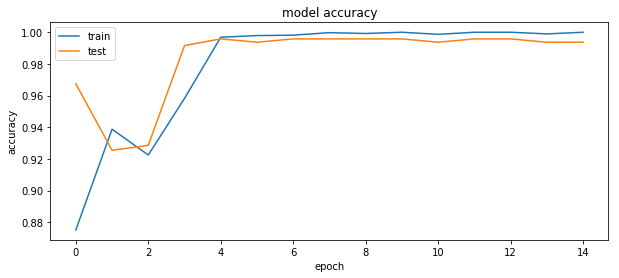

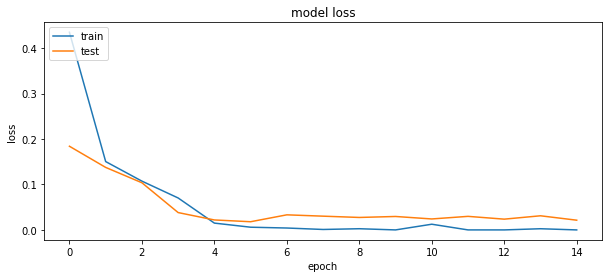

In [31]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 4
plt.plot(cnn_2.history['accuracy'])
plt.plot(cnn_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(cnn_2.history['loss'])
plt.plot(cnn_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
model_3 = Sequential()

model_3.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_3.add(Conv2D(32, (3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.5))
model_3.add(Flatten())
model_3.add(Dense(num_classes, activation='sigmoid'))


model_3.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=["accuracy"])
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 188, 208, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 186, 206, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 93, 103, 32)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 93, 103, 32)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 306528)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 613058    
Total params: 623,202
Trainable params: 623,202
Non-trainable params: 0
________________________________________________

In [33]:
cnn_3 = model_3.fit(X_train, y_train, batch_size=batch_size, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 1902 samples, validate on 476 samples
Epoch 1/15
1902/1902 [==============================] - 3s 2ms/step - loss: 0.2847 - accuracy: 0.8927 - val_loss: 0.2001 - val_accuracy: 0.9527
Epoch 2/15
1902/1902 [==============================] - 2s 1ms/step - loss: 0.0535 - accuracy: 0.9863 - val_loss: 0.7571 - val_accuracy: 0.5861
Epoch 3/15
1902/1902 [==============================] - 2s 1ms/step - loss: 0.0211 - accuracy: 0.9924 - val_loss: 0.0136 - val_accuracy: 0.9958
Epoch 4/15
1902/1902 [==============================] - 2s 1ms/step - loss: 0.0299 - accuracy: 0.9953 - val_loss: 0.0177 - val_accuracy: 0.9958
Epoch 5/15
1902/1902 [==============================] - 2s 1ms/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0134 - val_accuracy: 0.9958
Epoch 6/15
1902/1902 [==============================] - 2s 1ms/step - loss: 0.0327 - accuracy: 0.9974 - val_loss: 0.0225 - val_accuracy: 0.9958
Epoch 7/15
1902/1902 [==============================] - 2s 1ms/step - loss: 2.9997e-04 - 

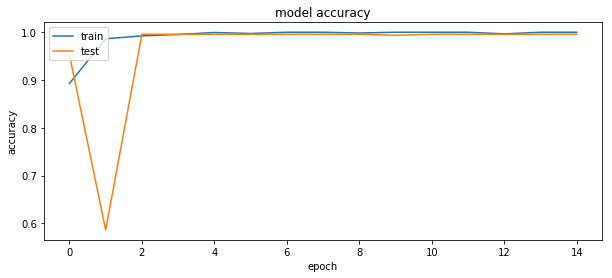

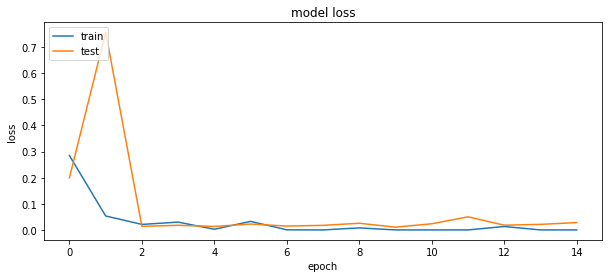

In [34]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 4
plt.plot(cnn_3.history['accuracy'])
plt.plot(cnn_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(cnn_3.history['loss'])
plt.plot(cnn_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [36]:
new_cnn_2 = model.fit(X_train, y_train, batch_size=batch_size, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 1902 samples, validate on 476 samples
Epoch 1/10
1902/1902 [==============================] - 2s 983us/step - loss: 0.0363 - accuracy: 0.9887 - val_loss: 0.0487 - val_accuracy: 0.9874
Epoch 2/10
1902/1902 [==============================] - 2s 962us/step - loss: 0.0278 - accuracy: 0.9876 - val_loss: 0.0341 - val_accuracy: 0.9937
Epoch 3/10
1902/1902 [==============================] - 2s 958us/step - loss: 0.0301 - accuracy: 0.9897 - val_loss: 0.0451 - val_accuracy: 0.9937
Epoch 4/10
1902/1902 [==============================] - 2s 964us/step - loss: 0.0239 - accuracy: 0.9905 - val_loss: 0.0543 - val_accuracy: 0.9937
Epoch 5/10
1902/1902 [==============================] - 2s 962us/step - loss: 0.0166 - accuracy: 0.9942 - val_loss: 0.0709 - val_accuracy: 0.9937
Epoch 6/10
1902/1902 [==============================] - 2s 949us/step - loss: 0.0258 - accuracy: 0.9869 - val_loss: 0.1800 - val_accuracy: 0.9769
Epoch 7/10
1902/1902 [==============================] - 2s 954us/step - loss:

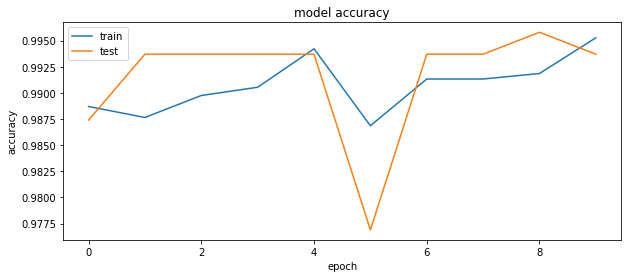

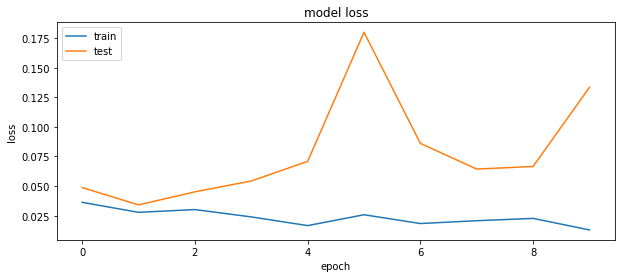

In [37]:
rcParams['figure.figsize'] = 10, 4
plt.plot(new_cnn_2.history['accuracy'])
plt.plot(new_cnn_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(new_cnn_2.history['loss'])
plt.plot(new_cnn_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
Test = []

img_list = os.listdir(TEST_PATH)
for img in img_list:
    print(img)
    Test_img = cv2.imread(TEST_PATH + '/' + img)
    Test_img_resize=cv2.resize(Test_img,(img_rows,img_cols))
    print('Image Dimensions :', Test_img_resize.shape)
    Test.append(Test_img_resize)
        #target_column.append(dataset)

9336923.8.jpg
Image Dimensions : (190, 210, 3)
IMG-20171218-WA0008.jpg
Image Dimensions : (190, 210, 3)
WIN_20191009_12_21_44_Pro.jpg
Image Dimensions : (190, 210, 3)
ant_exp.19.jpg
Image Dimensions : (190, 210, 3)
WIN_20191009_12_22_01_Pro.jpg
Image Dimensions : (190, 210, 3)
WIN_20191009_12_22_54_Pro.jpg
Image Dimensions : (190, 210, 3)


In [39]:
Test = np.array(Test)
Test = Test.astype('float32')
Test /= 255

In [40]:
# predict results
from sklearn.metrics import confusion_matrix
results = model_2.predict(Test)
results.shape

(6, 2)

In [41]:
print(model_2.predict_classes(Test))

[0 1 1 1 1 1]


AxesImage(90,36;558x217.44)


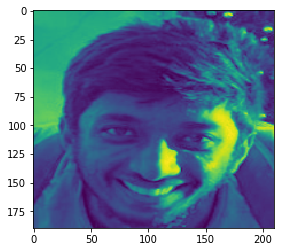

In [42]:
#thats me and the model predicted it right.
print(plt.imshow(Test[1][:,:,0]))